In [10]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [11]:
input_dn_image_path = r'/Users/ayantanwar/Documents/CE712/CE-712-Assignments/LC09_L1TP_148047_20250418_20250418_02_T1_B5.TIF'

In [12]:
with rasterio.open(input_dn_image_path) as src :
    dn_image = src.read(1).astype(float)
    no_data_value = src.nodata
    if no_data_value is not None :
        dn_image = np.ma.masked_equal(dn_image,no_data_value)

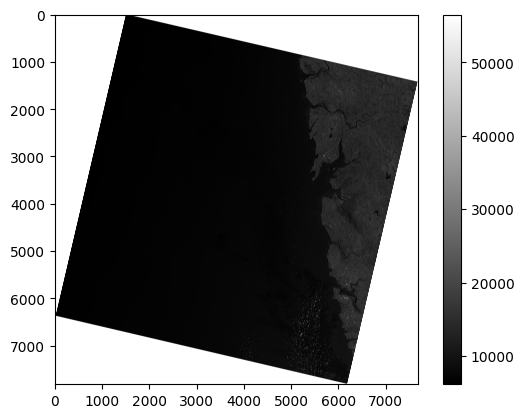

In [13]:
plt.imshow(dn_image, cmap = 'gray')
plt.colorbar()

In [14]:
nir_cropped = dn_image[3300:3800, 5800:6200]

In [ ]:
#define constants for reflectance calculation
mult_ref = 2.0000E-05 #gain
add_ref = -0.100000
angle_degrees = 65.51727527
angle_rad = np.deg2rad(angle_degrees)
re
#calculate reflectance
ref_image = (mult_ref * nir_cropped + add_ref) / np.sin(angle_rad)
ref_image[ref_image < 0] = np.nan

#define constants for radiance calculation
mult_rad = 6.0737E-03
add_rad = -30.36854

#calculate radiance
radiance_image5 = (mult_rad * nir_cropped + add_rad)
radiance_image5[radiance_image5 < 0] = np.nan

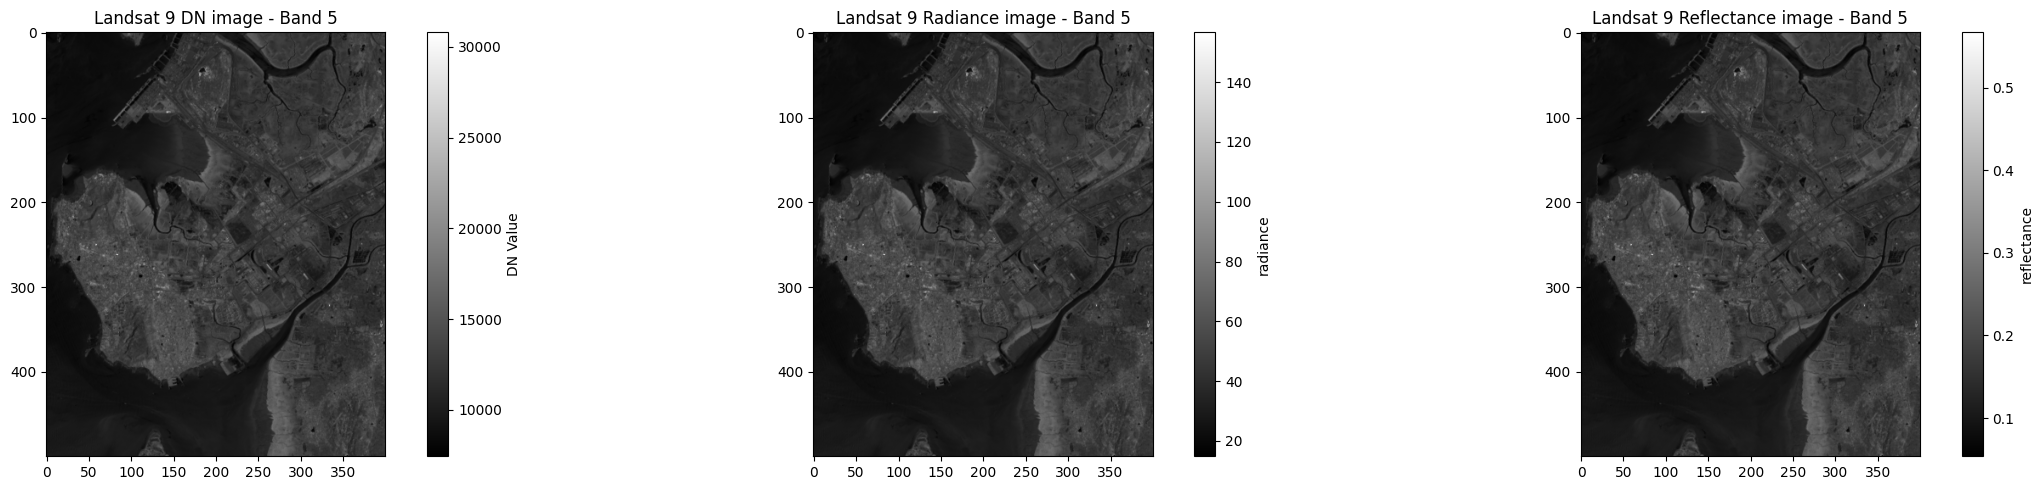

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 5))

# Plot the DN image (Digital Number)
dn_plot5 = ax1.imshow(nir_cropped, cmap='gray')
ax1.set_title('Landsat 9 DN image - Band 5')
fig.colorbar(dn_plot5, ax=ax1, label='DN Value')

# Plot the radiance image
radiance_plot5 = ax2.imshow(radiance_image5, cmap='gray')
ax2.set_title('Landsat 9 Radiance image - Band 5')
fig.colorbar(radiance_plot5, ax=ax2, label='radiance')

# Plot the reflectance image
reflectance_plot5 = ax3.imshow(ref_image, cmap='gray')
ax3.set_title('Landsat 9 Reflectance image - Band 5')
fig.colorbar(reflectance_plot5, ax=ax3, label='reflectance')

# Display the plots
plt.tight_layout()
plt.show()